In [1]:
# Dependencies
from pathlib import Path
import hvplot.pandas
import pandas as pd
import requests
import time
from scipy.stats import linregress
from matplotlib import pyplot as plt
import json
import numpy as np

from config import geoapify_key

---

# Parking Type

#### What parking type is most common in each city?

---

In [7]:
csv_file = Path("Output/All_City.csv")
city_df = pd.read_csv(csv_file)
city_df[["type", "city"]]

,type,city
0,multi-storey,New York
1,surface,New York
2,underground,New York
3,surface,New York
4,multi-storey,New York
...,...,...
316,surface,Phoenix
317,surface,Phoenix
318,surface,Phoenix
319,surface,Phoenix


In [185]:
cities = ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Fort Worth',
          'Atlanta', 'Milwaukee', 'Philadelphia', 'Phoenix']

type_list = []


for x in cities:
   
    type_data = city_df.loc[city_df["city"]==x]["type"]
    type_list.append(type_data)
   

## New York Parking Type

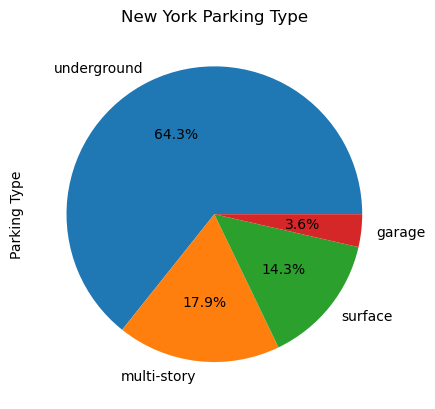

In [186]:
ny_pie = type_list[0].value_counts()
labels = ["underground", "multi-story", "surface", "garage"]

plt.pie(ny_pie, labels=labels, autopct="%1.1f%%")
plt.ylabel("Parking Type")
plt.title("New York Parking Type")

#save to output folder
plt.savefig("Output/NewYork_Pie.png", bbox_inches='tight')

plt.show()

## Los Angeles Parking Type

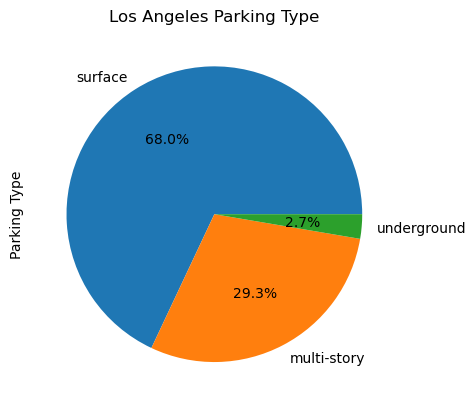

In [187]:
la_pie = type_list[1].value_counts()
labels = ["surface", "multi-story", "underground"]

plt.pie(la_pie, labels=labels, autopct="%1.1f%%")
plt.ylabel("Parking Type")
plt.title("Los Angeles Parking Type")

#save to output folder
plt.savefig("Output/LosAngeles_Pie.png", bbox_inches='tight')

plt.show()

## Chicago Parking Type

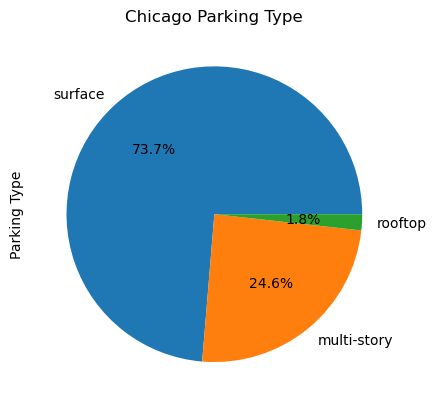

In [188]:
chicago_pie = type_list[2].value_counts()
labels = ["surface", "multi-story", "rooftop"]

plt.pie(chicago_pie, labels=labels, autopct="%1.1f%%")
plt.ylabel("Parking Type")
plt.title("Chicago Parking Type")

#save to output folder
plt.savefig("Output/Chicago_Pie.png", bbox_inches='tight')

plt.show()

## Houston Parking Types

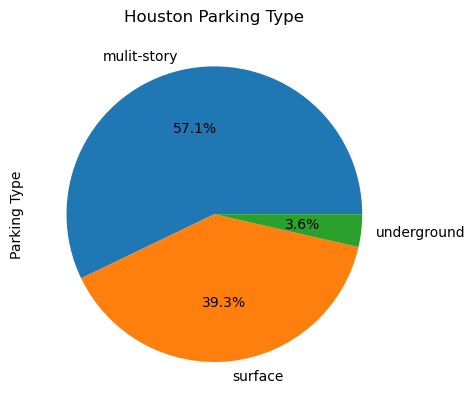

In [189]:
houston_pie = type_list[3].value_counts()
labels = ["mulit-story", "surface", "underground"]

plt.pie(houston_pie, labels=labels, autopct="%1.1f%%")
plt.ylabel("Parking Type")
plt.title("Houston Parking Type")

#save to output folder
plt.savefig("Output/Houston_Pie.png", bbox_inches='tight')

plt.show()

## Fort Worth Parking Types

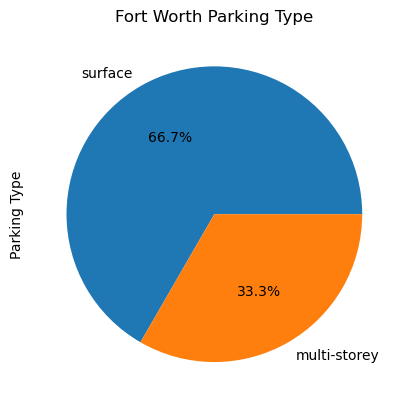

In [190]:
fw_pie = type_list[4].value_counts()
labels = type_list[4].unique()

plt.pie(fw_pie, labels=labels, autopct="%1.1f%%")
plt.ylabel("Parking Type")
plt.title("Fort Worth Parking Type")

#save to output folder
plt.savefig("Output/FortWorth_Pie.png", bbox_inches='tight')

plt.show()

## Atlanta Parking Types

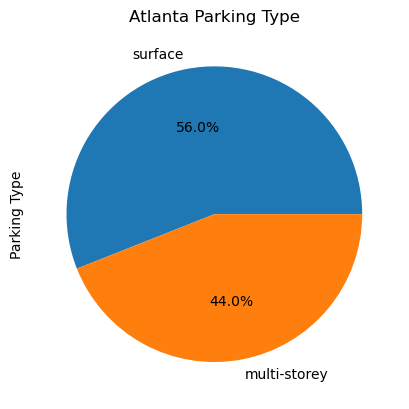

In [200]:
atl_pie = type_list[5].value_counts()
labels = type_list[5].unique()

plt.pie(atl_pie, labels=labels, autopct="%1.1f%%")
plt.ylabel("Parking Type")
plt.title("Atlanta Parking Type")

#save to output folder
plt.savefig("Output/Atlanta_Pie.png", bbox_inches='tight')

plt.show()

## Milwaukee Parking Types

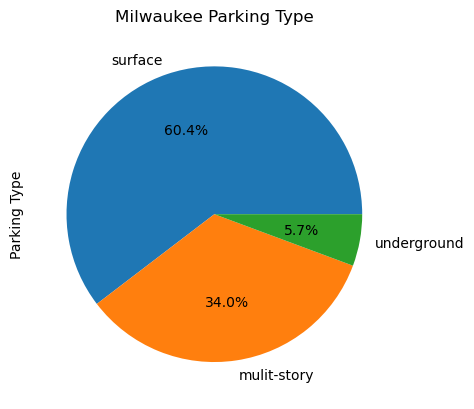

In [201]:
mil_pie = type_list[6].value_counts()
labels = ["surface", "mulit-story", "underground"]

plt.pie(mil_pie, labels=labels, autopct="%1.1f%%")
plt.ylabel("Parking Type")
plt.title("Milwaukee Parking Type")

#save to output folder
plt.savefig("Output/Milwaukee_Pie.png", bbox_inches='tight')

plt.show()

## Philadelphia Parking Types

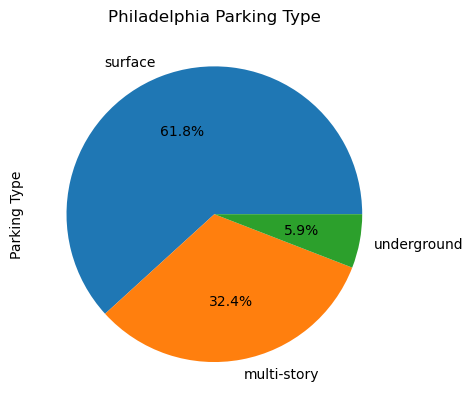

In [199]:
pa_pie = type_list[7].value_counts()
labels = ["surface", "multi-story", "underground"]

plt.pie(pa_pie, labels=labels, autopct="%1.1f%%")
plt.ylabel("Parking Type")
plt.title("Philadelphia Parking Type")

#save to output folder
plt.savefig("Output/Philadelphia_Pie.png", bbox_inches='tight')

plt.show()

## Phoenix Parking Types

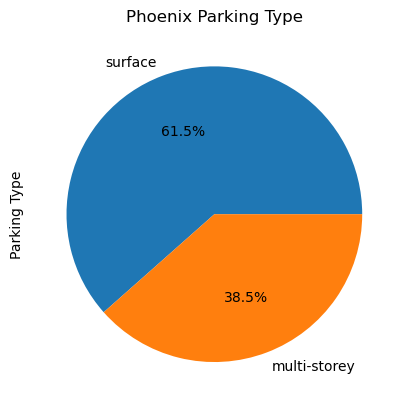

In [195]:
az_pie = type_list[8].value_counts()
labels = type_list[8].unique()

plt.pie(az_pie, labels=labels, autopct="%1.1f%%")
plt.ylabel("Parking Type")
plt.title("Phoenix Parking Type")

#save to output folder
plt.savefig("Output/Phoenix_Pie.png", bbox_inches='tight')

plt.show()

In [211]:
#find the most common parking type for each city
park_max = []

ny_max = type_list[0].max()
park_max.append(ny_max)

la_max = type_list[1].max()
park_max.append(la_max)

chi_max = type_list[2].max()
park_max.append(chi_max)

houston_max = type_list[3].max()
park_max.append(houston_max)

fw_max = type_list[4].max()
park_max.append(fw_max)

atl_max = type_list[5].max()
park_max.append(atl_max)

mil_max = type_list[6].max()
park_max.append(mil_max)

phil_max = type_list[7].max()
park_max.append(phil_max)

az_max = type_list[8].max()
park_max.append(az_max)



df = pd.DataFrame(park_max, columns=["Parking Type"])
df["City"] = ["New York County", "Los Angeles", "Chicago", "Houston", "Fort Worth","Atlanta",
              "Milwaukee", "Philadelphia", "Phoenix"]
type_df = df[["City", "Parking Type"]]
type_df

,City,Parking Type
0,New York County,underground
1,Los Angeles,underground
2,Chicago,surface
3,Houston,underground
4,Fort Worth,surface
5,Atlanta,surface
6,Milwaukee,underground
7,Philadelphia,underground
8,Phoenix,surface


---

# Population per City

#### How does the population of a city affect the parking type?

---

In [213]:
url = "https://api.geoapify.com/v2/place-details?"

In [214]:
#fill in all the city ID in a list
ID = ["5151f935f90f9a5dc059ec5ce2bd750b4140f00101f901ff29030000000000c0020692030b4c6f7320416e67656c6573",
      "519bc800fa0fd857c0597523e5cbc5c63d40f00101f9018f07290000000000c00206920307486f7573746f6e",
      "517bd8384d167e52c059afb076b00e634440f00101f901a5f2260000000000c0020992030f4e657720596f726b20436f756e7479",
      "51a6c49a45e4eb55c0595a1990664ceb4440f00101f901ecde010000000000c002069203074368696361676f",
      "519bc800fa0fd857c0597523e5cbc5c63d40f00101f9018f07290000000000c00206920307486f7573746f6e",
      "512b903aab385658c059df25b52d0e644040f00101f9014ac2010000000000c0020692030a466f727420576f727468",
      "513497aaa46d0d54c059f33cfd817cc63940f00101f90101911200000000009203054d69616d69",
      "51fc8114f40e1b55c059eb5631899de14040f00101f90105d3010000000000c0020692030741746c616e7461",
      "5170bdda59bffd55c059eafb089e0f884540f00101f901c3d4030000000000c002069203094d696c7761756b6565",
      "51d80144b194c852c0590b89d6a9f9004440f00101f90176de020000000000c0020692030c5068696c6164656c70686961",
      "518ceee3f2b6055cc059373e2c342dc94040f00101f90199b2010000000000c0020692030750686f656e6978"]

#set features to equal what to look for
features = "details,details.names"


pop_list = []

#create a loop to loop through each city and pull the data
for x in ID:
    pop_dict = {}
    try:
        response = requests.get(f"{url}id={x}&features={features}&apiKey={geoapify_key}").json()
        
        pop_dict["City"] = response["features"][0]["properties"]["name"]
        pop_dict["Population"] = response["features"][0]["properties"]["datasource"]["raw"]["population"]
        pop_dict["Lat"] = response["features"][0]["properties"]["lat"]
        pop_dict["Lon"] = response["features"][0]["properties"]["lon"]
        pop_list.append(pop_dict)
        
    except:
        pass

In [215]:
#get rid of extra houston row
population_df = pd.DataFrame(pop_list)
population_df = population_df.drop(labels=1, axis=0)
population_df

,City,Population,Lat,Lon
0,Los Angeles,4030904,34.053691,-118.242766
2,New York County,1694251,40.781486,-73.959054
3,Chicago,2746388,41.875562,-87.624421
4,Houston,2304580,29.758938,-95.367697
5,Fort Worth,727577,32.753177,-97.332746
6,Atlanta,506804,33.748992,-84.390264
7,Milwaukee,605013,43.034993,-87.922497
8,Philadelphia,1526006,39.952724,-75.163526
9,Phoenix,1608139,33.448437,-112.074141


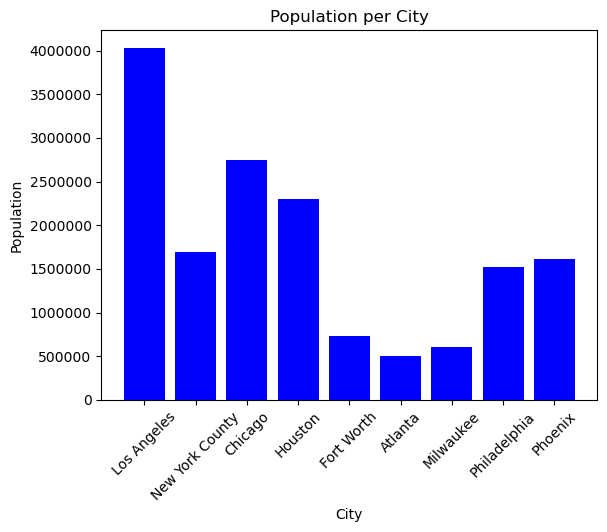

In [216]:
#Population bar chart
x = population_df["City"]
y = population_df["Population"]

plt.ticklabel_format(style='plain')
plt.bar(x, y, color="b")
plt.xticks(rotation=45)
plt.title("Population per City")
plt.xlabel("City")
plt.ylabel("Population")
plt.show()

In [236]:
#merge the population df and the type df to create one
merge_df = population_df.merge(type_df, on="City")

#save as csv file
merge_df.to_csv("Output/Population.csv", index_label="city ID")

In [245]:
# Configure the map plot
map_plot = merge_df.hvplot.points("Lon",
                                    "Lat",
                                    geo = True,
                                    tiles = "OSM",
                                    color="City",
                                    size=100,
                                    frame_width = 700,
                                    frame_height = 500, 
                                    hover_cols=["Parking Type", "Population"])


# Display the map
map_plot


:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lon,Lat]   (City,Parking Type,Population)